In [1]:
# grep -i "gw01.extranet.frachtwerk.de filterlog" pfsense.log > pfsense.csv
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', None)



In [36]:
# Daten werden eingelesen
df = pd.read_csv("/Users/denakarimi/Desktop/WS20:21/BDA/pfsense.csv", sep=',', header=None, names=range(30))
# Sample wird erstellt zur schnelleren Datenverarbeitung
df = df.sample (n=10000)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
10674068,Nov 11 21:26:40 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,242,57739,0,none,6,tcp,40,207.246.96.51,5.182.200.10,55930,8845,0.0,S,1466567436,NaN,1024.0,NaN,NaN,NaN
319539,Sep 12 03:36:48 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,250,52284,0,none,6,tcp,40,195.54.160.38,5.182.200.13,42645,19963,0.0,S,4089924042,NaN,1024.0,NaN,NaN,NaN
11366871,Nov 15 01:28:56 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,248,58594,0,none,17,udp,48,12.151.56.23,5.182.200.15,61337,3478,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13377311,Nov 22 08:24:11 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,248,38328,0,none,17,udp,29,51.222.72.146,5.182.200.15,366,32414,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385360,Oct 18 04:38:45 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,241,8759,0,none,6,tcp,40,180.71.47.198,5.182.200.15,49374,7927,0.0,S,2651714767,NaN,1024.0,NaN,NaN,NaN
9872899,Nov 7 12:30:25 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,249,16659,0,none,6,tcp,40,193.27.228.32,5.182.200.17,56893,21824,0.0,S,189520962,NaN,1024.0,NaN,NaN,NaN
8441975,Oct 30 16:01:12 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,248,51595,0,none,17,udp,48,95.156.220.75,5.182.200.15,9996,3478,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3654161,Oct 12 08:30:52 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,51,58061,0,DF,17,udp,434,103.145.13.152,5.182.200.14,5108,5420,414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6521714,Oct 25 20:41:58 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,248,61560,0,none,17,udp,48,85.190.153.96,5.182.200.15,10041,3478,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530655,Sep 14 09:32:34 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1597937078,vtnet0,match,block,in,4,0x0,NaN,51,0,0,DF,6,tcp,64,80.187.96.145,5.182.200.13,25467,31860,0.0,S,1631985503,NaN,65535.0,NaN,mss;nop;wscale;nop;nop;TS;sackOK;eol,NaN


In [9]:
df = pd.read_csv("/Users/denakarimi/Desktop/WS20:21/BDA/workingpfsense.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0,10674068,Nov 11 21:26:40 gw01.extranet.frachtwerk.de fi...,1597937078,vtnet0,match,block,in,4,0x0,NaN,242,57739,0,none,6,tcp,40.0,207.246.96.51,5.182.200.10,55930,8845.0,0.0,S,1466567436,NaN,1024.0,NaN,NaN
1,1,319539,Sep 12 03:36:48 gw01.extranet.frachtwerk.de fi...,1597937078,vtnet0,match,block,in,4,0x0,NaN,250,52284,0,none,6,tcp,40.0,195.54.160.38,5.182.200.13,42645,19963.0,0.0,S,4089924042,NaN,1024.0,NaN,NaN
2,2,11366871,Nov 15 01:28:56 gw01.extranet.frachtwerk.de fi...,1597937078,vtnet0,match,block,in,4,0x0,NaN,248,58594,0,none,17,udp,48.0,12.151.56.23,5.182.200.15,61337,3478.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,13377311,Nov 22 08:24:11 gw01.extranet.frachtwerk.de fi...,1597937078,vtnet0,match,block,in,4,0x0,NaN,248,38328,0,none,17,udp,29.0,51.222.72.146,5.182.200.15,366,32414.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4385360,Oct 18 04:38:45 gw01.extranet.frachtwerk.de fi...,1597937078,vtnet0,match,block,in,4,0x0,NaN,241,8759,0,none,6,tcp,40.0,180.71.47.198,5.182.200.15,49374,7927.0,0.0,S,2651714767,NaN,1024.0,NaN,NaN


In [3]:
# Datenbereinung: NA werden entfernt
df.dropna(how='all', axis=1, inplace=True) 

In [16]:
# Reihen mit NA werden entfernt
df["21"].dropna(inplace=True) 
df["22"].dropna(inplace=True) 

In [ ]:
# Funktion zur Änderung des Datentyps
def parse_dtype(df, dtypes):
    for col in dtypes.keys():
        df[col] = df[col].astype(dtypes[col])
    return df

In [18]:
# Datentyp in Spalten 21 & 22 zu float
df[["21","22"]] = df[["21",'22']].astype(float)

In [40]:
# dtypes = {'value':'datetime64[ns]', 'offset':'int', 'length':'int', 'data_length':'int'}
dtypes = {'offset':'float', 'length':'float', 'data_length':'float', 'source_port': 'int'}
df = parse_dtype(df, dtypes)

KeyError: 'offset'

In [19]:
# Ausgabe von Informationen zum Datenframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
Unnamed: 0      10000 non-null int64
Unnamed: 0.1    10000 non-null int64
0               10000 non-null object
3               10000 non-null int64
4               10000 non-null object
5               10000 non-null object
6               10000 non-null object
7               10000 non-null object
8               10000 non-null int64
9               10000 non-null object
10              73 non-null object
11              10000 non-null int64
12              10000 non-null object
13              10000 non-null int64
14              10000 non-null object
15              10000 non-null object
16              10000 non-null object
17              9942 non-null float64
18              9942 non-null object
19              9942 non-null object
20              9942 non-null object
21              9940 non-null float64
22              9940 non-null float64
23              5987 non-null 

3478.0     3580
10051.0     345
23.0        312
445.0       283
8080.0      143
80.0        110
465.0        93
443.0        89
81.0         84
2587.0       77
5060.0       62
22.0         59
3074.0       48
5555.0       25
6576.0       22
1433.0       22
8291.0       22
3389.0       21
27015.0      20
2323.0       19
123.0        18
8081.0       18
8089.0       16
33848.0      14
5038.0       13
161.0        11
60001.0      10
28473.0      10
389.0        10
53.0         10
           ... 
24112.0       1
1834.0        1
53911.0       1
5215.0        1
22102.0       1
63128.0       1
25244.0       1
64159.0       1
36692.0       1
14086.0       1
48798.0       1
45303.0       1
56204.0       1
34756.0       1
7252.0        1
23512.0       1
7100.0        1
13735.0       1
34919.0       1
22014.0       1
41496.0       1
40603.0       1
51750.0       1
18340.0       1
32054.0       1
35481.0       1
11689.0       1
25456.0       1
3820.0        1
6670.0        1
Name: 21, Length: 3754, 

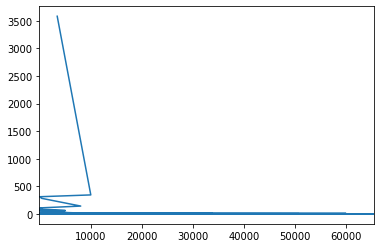

In [28]:
# Anzahl der Werte aus Spalte 21 werden ausgegeben
countedvalues_sourceport = df["21"].value_counts()
print (countedvalues_sourceport)
countedvalues_sourceport.plot ()

0.0          5855
28.0         3537
31.0           32
33.0           26
8.0            23
1458.0         22
24.0           21
108.0          21
413.0          19
39.0           18
37.0           17
60.0           16
9.0            16
421.0          14
414.0          13
423.0          10
63.0           10
411.0           8
419.0           8
12.0            7
58.0            7
48.0            7
200.0           6
412.0           6
51.0            6
36.0            6
417.0           5
64.0            5
56.0            5
20.0            5
             ... 
207.0           1
81.0            1
71.0            1
23.0            1
72.0            1
44.0            1
116.0           1
84.0            1
34.0            1
400.0           1
469.0           1
206.0           1
1460.0          1
211.0           1
287.0           1
307.0           1
404.0           1
127.0           1
228.0           1
220.0           1
53.0            1
59.0            1
3303944.0       1
95.0            1
101.0     

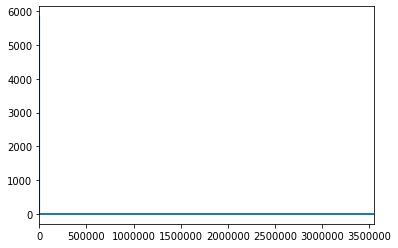

In [21]:
# Anzahl der Werte aus Spalte 22 werden ausgegeben
countedvalues_destinationport = df["22"].value_counts()
print (countedvalues_destinationport)
countedvalues_destinationport.plot ()

In [22]:
#Sortierung nach Standard (Well-known)/Registered/Private Ports für Source_Port und Destination_Port
for columnnames in ["21","22"] :
    df["Port Type_"+ str(columnnames)] = 0
    df.loc[(df[columnnames] > 0) & (df[columnnames] <1024), "Port Type_"+ str(columnnames)]="standard-port"
    df.loc[(df[columnnames] > 1023) & (df[columnnames] <49152), "Port Type_"+ str(columnnames)]="registered-port"
    df.loc[(df[columnnames] > 49151), "Port Type_"+ str(columnnames)]="private-port"

registered-port    8033
standard-port      1319
private-port        588
0                    60
Name: Port Type_21, dtype: int64


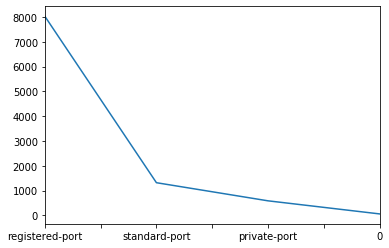

In [23]:
# Anzahl der Port Typen wird gezählt und geplotted
countedporttype_sourceport = df["Port Type_21"].value_counts()
print (countedporttype_sourceport)
countedporttype_sourceport.plot ()

0                  5915
standard-port      4046
registered-port      35
private-port          4
Name: Port Type_22, dtype: int64


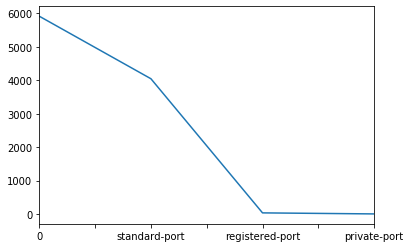

In [24]:
# Anzahl der Port Typen wird gezählt und geplotted
countedporttype_destinationport = df["Port Type_22"].value_counts()
print (countedporttype_destinationport)
countedporttype_destinationport.plot ()

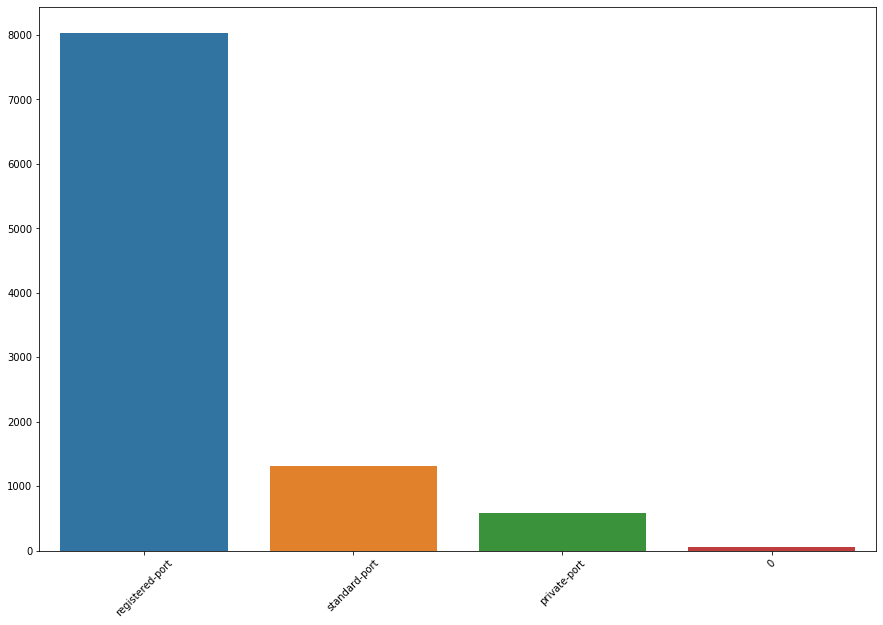

In [25]:
# Balkendiagramm zu Plot Types bei Source_Port
fig, ax = plt.subplots(figsize=(15, 10))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax = sns.barplot(x=countedporttype_sourceport.index, y=countedporttype_sourceport.values)

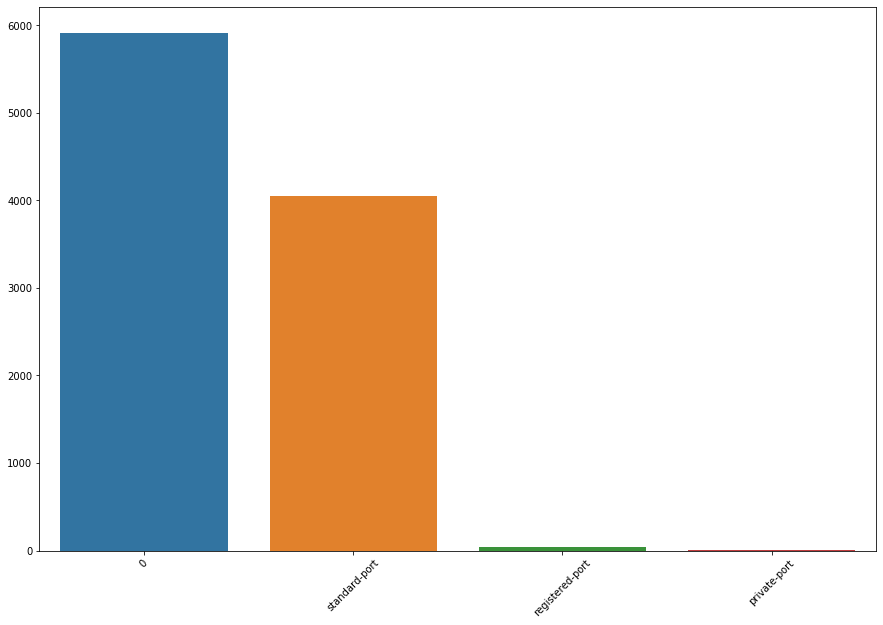

In [26]:
# Balkendiagramm zu Plot Types bei Destination_Port
fig, ax = plt.subplots(figsize=(15, 10))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax = sns.barplot(x=countedporttype_destinationport.index, y=countedporttype_destinationport.values)

In [29]:
# Spalten werden hinzugefügt: Wie oft gibt es welchen Port?
df=df.merge(countedvalues_sourceport, how="left", left_on="21", right_index=True, suffixes=('', '_counted'))
df=df.merge(countedvalues_destinationport, how="left", left_on="22", right_index=True, suffixes=('', '_counted'))

In [30]:
# Ausgabe von Informationen zum Datenframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
Unnamed: 0      10000 non-null int64
Unnamed: 0.1    10000 non-null int64
0               10000 non-null object
3               10000 non-null int64
4               10000 non-null object
5               10000 non-null object
6               10000 non-null object
7               10000 non-null object
8               10000 non-null int64
9               10000 non-null object
10              73 non-null object
11              10000 non-null int64
12              10000 non-null object
13              10000 non-null int64
14              10000 non-null object
15              10000 non-null object
16              10000 non-null object
17              9942 non-null float64
18              9942 non-null object
19              9942 non-null object
20              9942 non-null object
21              9940 non-null float64
22              9940 non-null float64
23              5987 non-null 

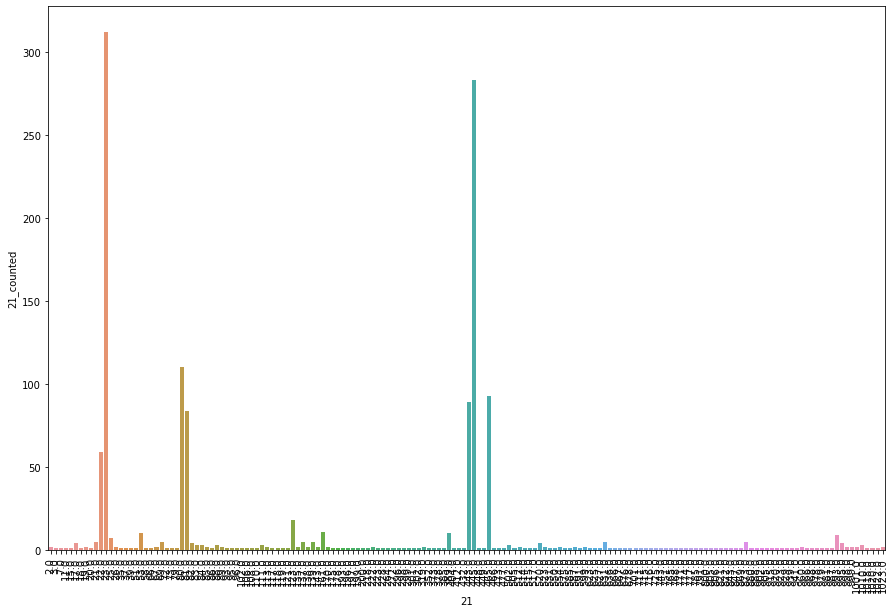

In [31]:
#Balkendiagramm zur Anzahl der Source_Ports
fig, ax = plt.subplots(figsize=(15, 10))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
ax = sns.barplot(x="21", y="21_counted", data=df.loc[df["Port Type_21"]=="standard-port"])

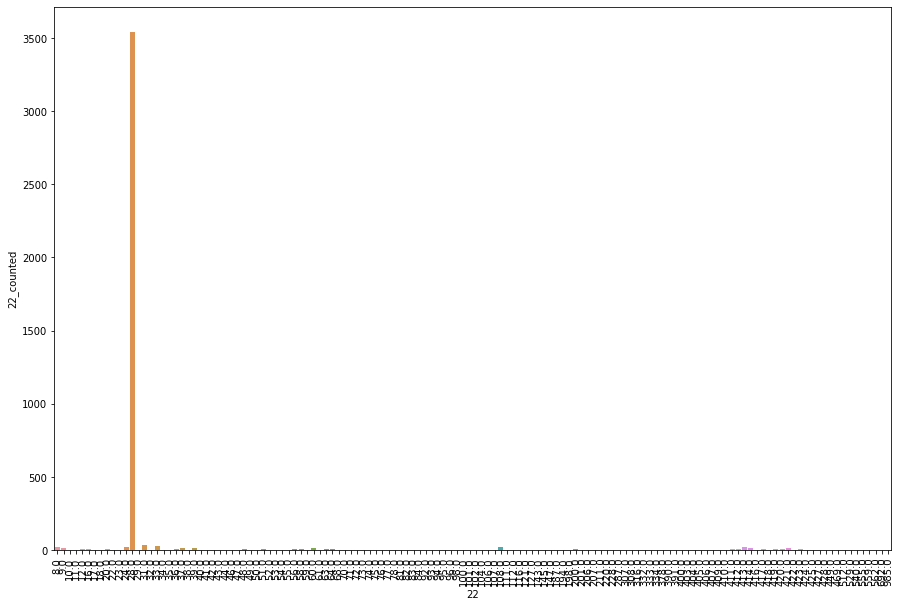

In [32]:
#Balkendiagramm zur Anzahl der Destination_Ports
fig, ax = plt.subplots(figsize=(15, 10))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
ax = sns.barplot(x="22", y="22_counted", data=df.loc[df["Port Type_22"]=="standard-port"])

Dokumentation

* Netzwerk-Port ist eine Adresse, mit deren Hilfe sich UDP- oder TCP- Verbindungen eindeutig bestimmten Anwendungen zuordnen lassen. Zu einer Verbindung gehört auf beiden Seiten jeweils ein Port. Ports können eine fortlaufende Nummer im Bereich von 0 bis 65535 annehmen. Zusammen mit der IP-Adresse bildet der Netzwerk-Port die vollständige Adresse einer Anwendung auf einem Ziel- oder Absendersystem.
* TCP (Transmission Control Protocol) ist eines der zentralen Protokolle der TCP/IP-Protokollfamilie. Es nutzt auf der Vermittlungsebene die Funktionen des IP, sorgt für gesicherte end-to-end-Verbindungen zwischen den Kommunkationspartnern und adressiert über Ports die Anwendungen höherer Ebenen. Die Source und Destination Port Zahlen spezifizieren jeweils die Anwendung/Service und werden verwendet, um die Anwendung oder Dienste anzugeben, die auf lokalen oder entfernten Hosts angeboten werden. Ein Host gibt bei der TCP/UDP-Datenkommunikation immer eine Destination- und Source-Portnummer an.
* UDP (User Datagram Protocols) baut auf dem IP. Im Gegensatz zu TCP handelt es sich um ein verbindungsloses, ungesichertes Protokoll. Die zentralen Funktionen sind der Transport von Daten und das Multiplexen von Verbindungen.
* Der Source_Port wird vom sendenden Host verwendet, um den Überblick über neu eingehende Verbindungen und bestehende Datenströme zu behalten. 
* Der Destination_Port ermöglicht den von ihm benötigten Dienst auszuwählen.